### Imorting the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
from keras.layers import *
from keras.models import *
from keras.preprocessing import image
import os

### Setting path for images

In [2]:
TRAIN_PATH = "CovidDataset/Train"
VAL_PATH = "CovidDataset/Test"


### Building a CNN based model

In [3]:
#CNN Based Model in keras
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 64)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 110, 110, 64)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                    

### Preprocessing data

In [5]:
train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    #below is data augmentation
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip = True,
)
test_datagen = image.ImageDataGenerator(
    rescale = 1./255,
)

In [6]:
train_generator = train_datagen.flow_from_directory(
    'CovidDataset/Train',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary'
)


Found 224 images belonging to 2 classes.


In [7]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [8]:
validation_generator = test_datagen.flow_from_directory(
    'CovidDataset/Val',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary'
)

Found 60 images belonging to 2 classes.


### Training the model

In [9]:
hist = model.fit(train_generator,
                  epochs=10,
                  validation_data=validation_generator,
                  batch_size=128)

Epoch 1/10
7/7 [==============================] - 34s 4s/step - loss: 1.1885 - accuracy: 0.5179 - val_loss: 0.6926 - val_accuracy: 0.5000
Epoch 2/10
7/7 [==============================] - 28s 4s/step - loss: 0.6876 - accuracy: 0.5580 - val_loss: 0.6809 - val_accuracy: 0.8500
Epoch 3/10
7/7 [==============================] - 53s 8s/step - loss: 0.6388 - accuracy: 0.6830 - val_loss: 0.5378 - val_accuracy: 0.9333
Epoch 4/10
7/7 [==============================] - 27s 4s/step - loss: 0.4520 - accuracy: 0.7857 - val_loss: 0.3216 - val_accuracy: 0.9333
Epoch 5/10
7/7 [==============================] - 28s 4s/step - loss: 0.2994 - accuracy: 0.8795 - val_loss: 0.2165 - val_accuracy: 0.9667
Epoch 6/10
7/7 [==============================] - 28s 4s/step - loss: 0.2312 - accuracy: 0.9241 - val_loss: 0.1566 - val_accuracy: 0.9667
Epoch 7/10
7/7 [==============================] - 27s 4s/step - loss: 0.1445 - accuracy: 0.9554 - val_loss: 0.0842 - val_accuracy: 0.9500
Epoch 8/10
7/7 [==================

### Evaluating the model

In [10]:
model.evaluate(train_generator)

7/7 [==============================] - 12s 2s/step - loss: 0.1397 - accuracy: 0.9598


[0.13971589505672455, 0.9598214030265808]

In [11]:
model.evaluate(validation_generator)

2/2 [==============================] - 3s 879ms/step - loss: 0.0928 - accuracy: 0.9667


[0.0927535817027092, 0.9666666388511658]

### Saving the model

In [12]:
model.save("model_covid.h5")

## Visualizing the model

In [13]:
model2 = load_model('model_covid.h5')

In [14]:
y_actual = []
y_test = []

In [15]:
for i in os.listdir("./CovidDataset/Val/Normal/"):
  img = image.load_img("./CovidDataset/Val/Normal/"+i,target_size=(224,224))
  img = image.img_to_array(img)
  img = np.expand_dims(img,axis=0)
  p = model2.predict(img)
  y_test.append(p[0][0].round())
  y_actual.append(1)

In [16]:
for i in os.listdir("./CovidDataset/Val/Covid/"):
  img = image.load_img("./CovidDataset/Val/Covid/"+i,target_size=(224,224))
  img = image.img_to_array(img)
  img = np.expand_dims(img,axis=0)
  p = model2.predict(img)
  y_test.append(p[0][0].round())
  y_actual.append(0)

In [17]:
y_actual = np.array(y_actual)
y_test = np.array(y_test)

In [18]:
from sklearn.metrics import confusion_matrix

In [19]:
cm = confusion_matrix(y_actual,y_test)

In [20]:
import seaborn as sns

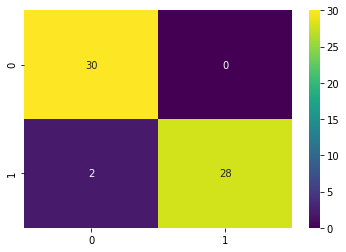

In [21]:
sns.heatmap(cm,cmap="viridis",annot=True)

In [22]:
import matplotlib.pyplot as plt
loss_train = hist.history['loss']

loss_val = hist.history['val_loss']

### Training loss vs Validation loss

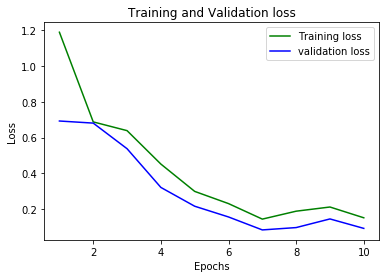

In [23]:
epochs_range = range(1,11)

plt.plot(epochs_range, loss_train, 'g', label='Training loss')

plt.plot(epochs_range, loss_val, 'b', label='validation loss')

plt.title('Training and Validation loss')

plt.xlabel('Epochs')

plt.ylabel('Loss')

plt.legend()

plt.show()

### Accuracy vs Val. accuracy 

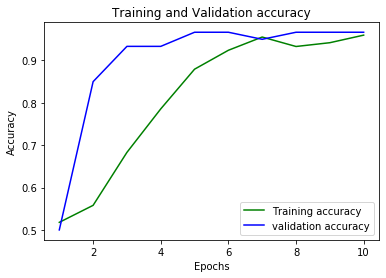

In [24]:
loss_train = hist.history['accuracy']

loss_val = hist.history['val_accuracy']

epochs = range(1,11)

plt.plot(epochs, loss_train, 'g', label='Training accuracy')

plt.plot(epochs, loss_val, 'b', label='validation accuracy')

plt.title('Training and Validation accuracy')

plt.xlabel('Epochs')

plt.ylabel('Accuracy')

plt.legend()

plt.show()

### Testing on real world images

In [35]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

Found 94 files belonging to 2 classes.
1.0 
 ['covid', 'normal']
Prediction: Normal


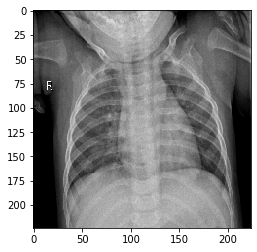

In [36]:
DIR = "archive/dataset"
classes = tf.keras.preprocessing.image_dataset_from_directory(DIR)
classes.class_names


image1 = "archive/dataset/covid/1-s2.0-S0140673620303706-fx1_lrg.jpg"
image2 = "archive/dataset/covid/1312A392-67A3-4EBF-9319-810CF6DA5EF6.jpeg"
image3 = "archive/dataset/normal/IM-0131-0001.jpeg"
image4 = "archive/dataset/normal/NORMAL2-IM-0609-0001.jpeg"

path = image3

img = tf.keras.preprocessing.image.load_img(path, target_size=(224, 224))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) 

predictions = model2.predict(img_array)

print(predictions[0][0], "\n", classes.class_names)
if(predictions[0][0] == 1):
    print("Prediction: Normal")
else:
    print("Prediction: Covid")
plt.imshow(img)